In [66]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# EXPLORATORY DATA ANALYSIS # 

In [68]:
df_2024 = pd.read_excel("Data Bencana.xlsx")


In [69]:
df_allYear = pd.read_excel("Per Tahun.xlsx")

In [70]:
df_2024 = df_2024.drop(columns="No.")
df_allYear = df_allYear.drop(columns="No.")

In [71]:
df_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Kode Identitas Bencana   125 non-null    object        
 1   ID Kabupaten             125 non-null    int64         
 2   Tanggal Kejadian         125 non-null    datetime64[ns]
 3   Kejadian                 125 non-null    object        
 4   Lokasi                   124 non-null    object        
 5   Kabupaten                125 non-null    object        
 6   Provinsi                 125 non-null    object        
 7   Kronologi & Dokumentasi  125 non-null    object        
 8   Penyebab                 124 non-null    object        
 9   Meninggal                125 non-null    int64         
 10  Hilang                   125 non-null    int64         
 11  Terluka                  125 non-null    int64         
 12  Rumah Rusak              125 non-nul

In [72]:
df_allYear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6110 entries, 0 to 6109
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Kode Identitas Bencana   4717 non-null   object        
 1   ID Kabupaten             6110 non-null   int64         
 2   Tanggal Kejadian         6110 non-null   datetime64[ns]
 3   Kejadian                 6110 non-null   object        
 4   Lokasi                   5837 non-null   object        
 5   Kabupaten                6110 non-null   object        
 6   Provinsi                 6110 non-null   object        
 7   Kronologi & Dokumentasi  6110 non-null   object        
 8   Penyebab                 4071 non-null   object        
 9   Meninggal                3513 non-null   float64       
 10  Hilang                   3473 non-null   float64       
 11  Terluka                  3664 non-null   float64       
 12  Rumah Rusak              6110 non-

In [73]:
df_allYear[df_allYear["Kode Identitas Bencana"].isnull()]

,Kode Identitas Bencana,ID Kabupaten,Tanggal Kejadian,Kejadian,Lokasi,Kabupaten,Provinsi,Kronologi & Dokumentasi,Penyebab,Meninggal,Hilang,Terluka,Rumah Rusak,Rumah Terendam,Fasum Rusak
4717,NaN,3322,2019-12-31,CUACA EKSTREM,Kec. Pabean Ds. Segiri Dsn. Segiri,SEMARANG,JAWA TENGAH,Dokumentasi,• Akibat hujan dengan intensitas tinggi,NaN,NaN,NaN,5,NaN,0
4718,NaN,3604,2019-12-31,CUACA EKSTREM,Kec. Carenang Ds. Mekarsari,SERANG,BANTEN,Dokumentasi,• Akibat hujan disertai angin kencang,NaN,NaN,NaN,1,NaN,0
4719,NaN,3604,2019-12-30,CUACA EKSTREM,Kec. Anyer Ds. Banjarsari,SERANG,BANTEN,Dokumentasi,• Akibat hujan disertai angin kencang,NaN,NaN,NaN,1,NaN,0
4720,NaN,3509,2019-12-30,CUACA EKSTREM,Kec. Silo Ds. Sumberjati Dsn. Kajar,JEMBER,JAWA TIMUR,Dokumentasi,• Akibat hujan disertai angin kencang,NaN,NaN,1.0,1,NaN,0
4721,NaN,5104,2019-12-30,CUACA EKSTREM,Kec. Tegalalang Ds. Pupuan,GIANYAR,BALI,Dokumentasi,• Akibat hujan disertai angin kencang dan poho...,NaN,NaN,NaN,1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6105,NaN,5202,2019-01-02,CUACA EKSTREM,Kec. Janapria,LOMBOK TENGAH,NUSA TENGGARA BARAT,Dokumentasi,NaN,0.0,0.0,0.0,4,NaN,0
6106,NaN,1805,2019-01-02,CUACA EKSTREM,Kec. Rawa Pitu,TULANG BAWANG,LAMPUNG,Dokumentasi,Akibat hujan dengan intensitas tinggi disertai...,NaN,NaN,NaN,91,NaN,0
6107,NaN,3513,2019-01-01,CUACA EKSTREM,Kec. Lumbang,PROBOLINGGO,JAWA TIMUR,Dokumentasi,NaN,NaN,NaN,NaN,4,NaN,1
6108,NaN,3374,2019-01-01,CUACA EKSTREM,Kec. Banyumanik dan Kec. Semarang Barat,KOTA SEMARANG,JAWA TENGAH,Dokumentasi,NaN,0.0,0.0,0.0,22,NaN,0


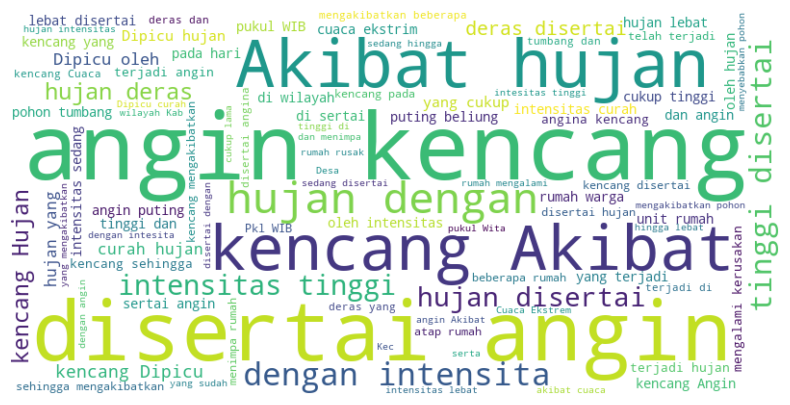

In [75]:
text = ' '.join(df_allYear['Penyebab'].dropna())

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color ='white', stopwords = None, min_font_size = 10).generate(text)

# Display the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()